## Project 4:
## Controlling an interface remotely with software. 

### Abstract & Description:

The objective is to control the Arduino over the serial port to measure some kind of interesting value over a period of one or two minutes. The option we picked is to measure temperature and altitude using an $i^2c$. 
As a result, we obtained roughly 22.8 C, which is almost the average of the ideal room temperature for scientific work, 23 C. The Altitude obtained went from 144 m to 154 m after taking the elevator. This does make sense knowing that the state of indiana is around 150m to 250 m above sea level.   
### Circuit schematic, Background and Discussion


The Bi-Directional Level Converter allows the Arduino and the Altimeter to communicate without getting confused or damaged. It is used to do logic level shifting. Also called a logic-level shifter, it is a circuit used to translate signals from one logic level or voltage domain to another, allowing compatibility between ICs with different voltage requirements, such as TTL and CMOS.


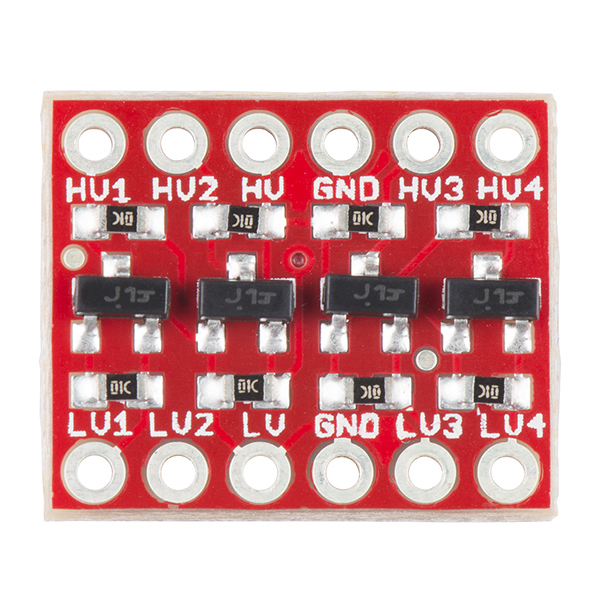

In [39]:
from IPython.display import Image
Image(filename='pic001.jpg', width = 320,height=240)

The sparkfun pressure/altitude/temperature sensor is a small device that allows to measure the altitude above sea level, temperature and pressure. As mentioned above, we will use this sensor to measure altitude and temperature.
The device has already its passive components integrated and all we need to do is simply connect it to something that talks I2C and get to work!

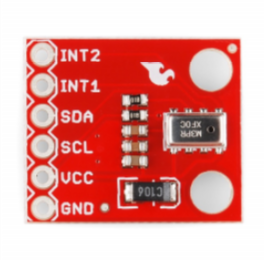

In [40]:
Image(filename='jk.png', width = 320,height=240)

### Circuit Function

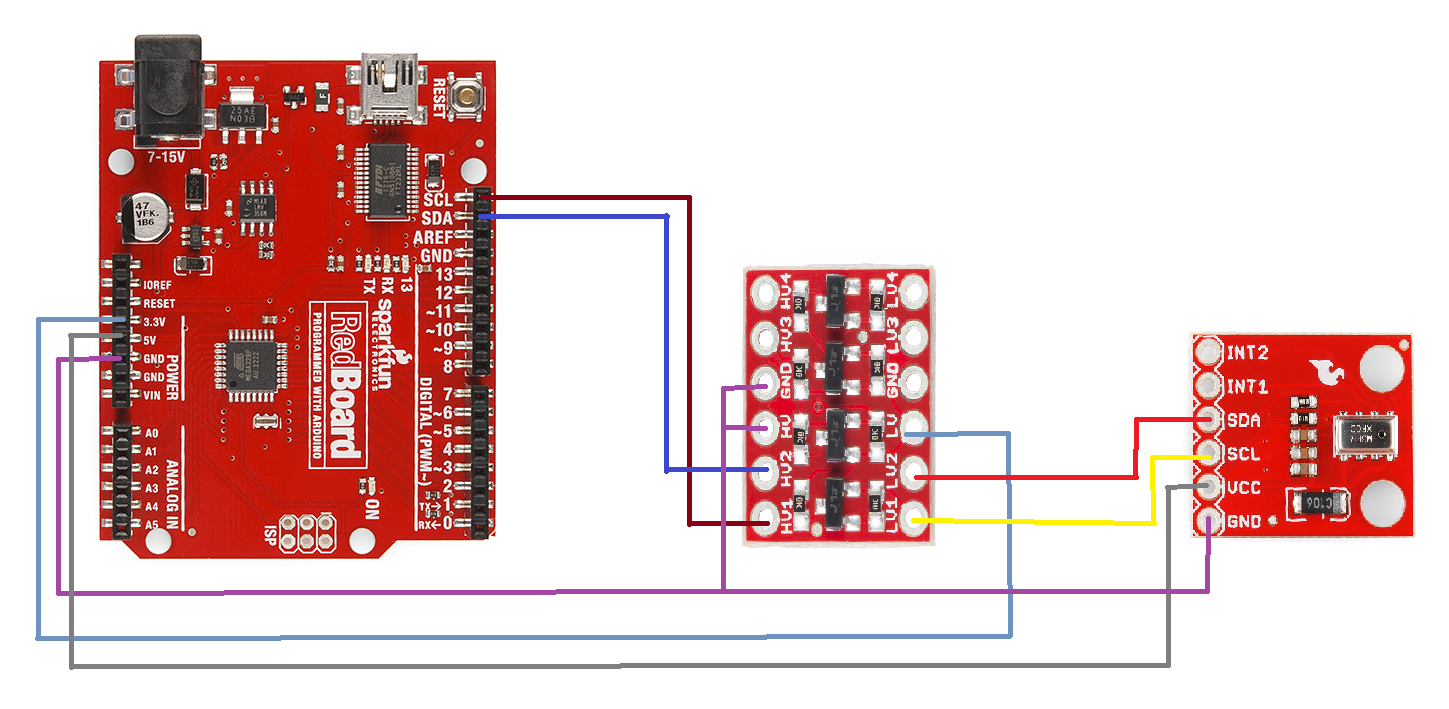

In [28]:
Image(filename='pic.png')

#### Code in the Arduino Software/ C
    #define LED 13              // pin 13 is the LED
    #define IN_ALT 0            // reading from analog in port 0 (altimeter)
    #define IN_TEMP 1           // reading from analog in port 1 (temperature sensor)
    #define NUMLOOPS 100         // every time we get a "g" command we take NUMLOOPS data points
    #define LOOP_DELAY 800      // How long to wait between measurements.

    #include <Wire.h>
    #include "SparkFunMPL3115A2.h"

    MPL3115A2 myPressure;        //Create an instance of the object

    void setup()
    {
        Wire.begin();               // Join i2c bus
        Serial.begin(9600);          // start serial port at 9600 bps:
        Serial.println("Hello");     // tell the computer we're ready
        pinMode(LED, OUTPUT);        // set LED pin to output    
    }

    void loop()
    {
      char command;
      float altitude;
      float temperature;

      if (Serial.available()>0)           // are there characters to read?
      {
          command = (char)Serial.read();        // grab one
          if (command=='g')               // check it
          {                  
              Serial.println("Begin");           // it's a "g", let's go!
              for (int i=0; i<NUMLOOPS; i++)
              {
                  altitude = myPressure.readAltitude();     // read a data point from the altimeter
                  temperature = myPressure.readTemp();     // read a data point from the temperature sensor
                  delay(LOOP_DELAY);          // wait for some milliseconds
                  Serial.print(i,DEC);        // print the count
                  Serial.print(",");
                  Serial.print(altitude, DEC);        // print the altitude
                  Serial.print(",");
                  Serial.println(temperature, DEC);   // print the temperature
              }
              Serial.println("End");      // terminator
           }
      }
      else
      {
          digitalWrite(LED, HIGH);           // flash our light to let folks know we're waiting.
          delay(LOOP_DELAY);
          digitalWrite(LED, LOW);
          delay(LOOP_DELAY);
      }
    }


#### Code in Python

    import serial

    port = serial.Serial('COM4')                        # open the serial port (WIN)

    print("Waiting for conversation...")

    s = port.readline().strip()             # read a line of input from the Arduino

    print ("got ",str(s))                   # echo to screen

    while s != b'Hello':                    # check for "Hello"
        s = port.readline().strip()         # not yet, try again
        print ("got ",str(s))

    port.write(b'g')                        # send a command

    s = port.readline().strip()             # get a reply

    indexes = []
    altitudes = []
    temperatures = []

    while s[:3] != b'End':                  # is it the end?
        print(str(s))                       # nope, echo, repeat
        data = s.decode()
        if ',' in data:
            index,alt,temp = data.split(',')
            indexes.append(index)
            altitudes.append(alt)
            temperatures.append(temp)
        s = port.readline().strip()

    print ("Finally got:", str(s))          # that's it!
    print ("Finished!")

    port.close()                            # shut it down

    print(indexes)
    print(altitudes)
    print(temperatures)

### Results:

In the following lines, we will investigate the behavior of the altimeter/temperature sensor using the data obtained during the experiment.

In [29]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_csv('Lab4.csv')
df.head()


,Altitudes (m),Temperatures (°C)
0,143.6875,22.2500
1,143.0625,22.0625
2,143.1250,22.0625
3,143.3125,22.1250
4,143.6250,22.0625


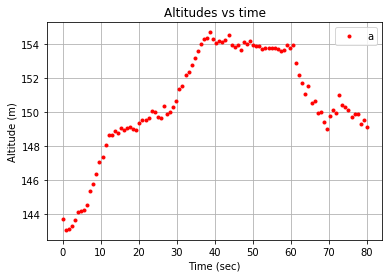

In [30]:
df = df.rename(columns={'Temperatures (°C)': 't'})
df = df.rename(columns={'Altitudes (m)': 'a'})
x = np.linspace(0,len(df.a)*0.8,len(df.a))
plt.plot(x,df.a,'r.')
plt.title("Altitudes vs time")
plt.grid()
plt.xlabel("Time (sec)")
plt.ylabel("Altitude (m)")
plt.legend()


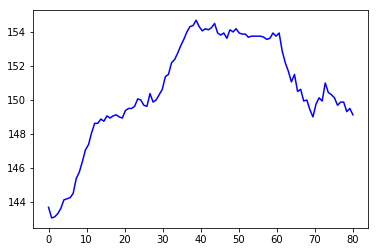

In [31]:
plt.plot(x,df.a,'b-')

As observed in the graph above, we clearly see that from 0s to 10s, the dots keep going up, which means that we are going up, using the elevator. From 10s to 25s, the graph looks like the altitude is almost constant, varying between 149-150m. That's because, in the elevator, we stopped at the second level to pick up other people. Once that completed, we went up again for an extra 6-8 meters high as we did in the first 10s. Once the third level reached, the value is constant from 40 to 60s, time to collect enough data. We finally decided to go back down and that is why the dots go down.

Text(0, 0.5, 'Temperature (c)')

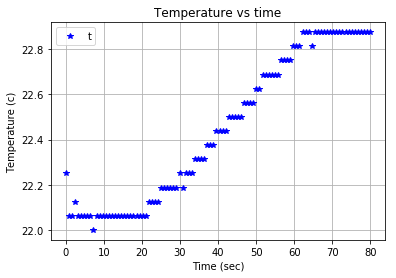

In [32]:
plt.plot(x,df.t,'b*')
plt.grid()
plt.legend()
plt.title("Temperature vs time")
plt.xlabel("Time (sec)")
plt.ylabel("Temperature (c)")

The temperature, as mentioned earlier, is roughly varying between 22 and 23 degree C. That makes sense knowing that the average of the ideal room temperature for scientific work is 23 C. The temperature was measured in the lab.


### Stats Exercises


Text(0.5, 1.0, 'mean differences of shuffled data')

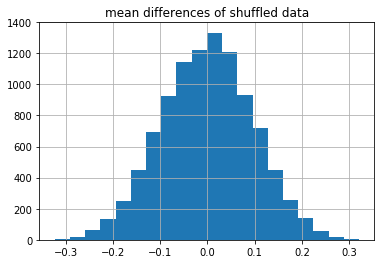

In [33]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

x1 = np.array([3.25466863, 2.97370402, 2.91113498, 3.4574893 , 3.17937048,
       3.03048094, 3.21812428, 2.81350504, 2.9976349 , 2.97788408,
       3.1813029 , 2.87498481, 2.90372449, 3.46095383, 3.11570786,
       2.69100383, 2.97142051, 2.72968174, 2.48244642, 2.8584929 ])
x2 = np.array([3.58365047, 3.04506491, 3.35190893, 2.76485786, 3.8494015 ,
       3.17593123, 3.03499338, 2.31533078, 2.58647626, 3.47397813,
       2.9985396 , 3.46170964, 3.23908075, 2.78904992, 3.000179  ,
       3.23386923, 3.10856455, 3.24167989, 2.92353227, 3.09131427])
iters = 10000
all_data = np.append(x1, x2)  # put all the data in one pot
mean_diffs = []

for i in range(iters):
    np.random.shuffle(all_data)                # stir the pot
    x1_mean_test = np.mean(all_data[:len(x1)]) # get mean of the first lot, like the original x1
    x2_mean_test = np.mean(all_data[len(x1):]) # get the mean of the second lot, like the original x2
    mean_diffs.append(x2_mean_test - x1_mean_test) # compute the difference of means and collect
    
mean_diffs = np.array(mean_diffs)  # convert to numpy array
plt.hist(mean_diffs,20)
plt.grid()
plt.title("mean differences of shuffled data")

In [34]:
pi_value = (mean_diffs>=0.109).sum()/iters
pi_value

0.1315

##### The pi_value obtained is considerably above 5%. The measured difference isn't statistically significant.

Text(0.5, 1.0, 'mean differences of shuffled data')

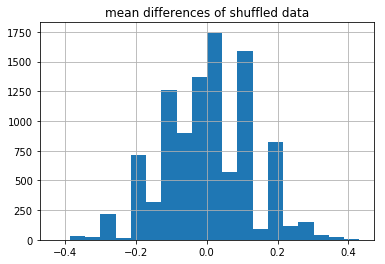

In [37]:
N = 10000
M_diff= []
h1 = df.t[0:20]
h2 = df.t[77:99]
h = np.append(h1,h2)

for i in range(N):
    np.random.shuffle(h)                # stir the pot
    h1_mean_test = np.mean(h[:len(h1)]) # get mean of the first lot, like the original x1
    h2_mean_test = np.mean(h[len(h1):]) # get the mean of the second lot, like the original x2
    M_diff.append(h2_mean_test - h1_mean_test) # compute the difference of means and collect
    
M_diff = np.array(M_diff)  # convert to numpy array
plt.hist(M_diff,20)
plt.grid()
plt.title("mean differences of shuffled data")

In [38]:
pi_V = (M_diff>=0.3).sum()/N
pi_V

0.0068

##### The pi_value being under 5%, the hypothesis test supports the measurement.

### Conclusion



In this experiment, we measured the altitude and temperature using the sparkfun pressure/altitude/temperature sensor. The results obtained for the temperature was pretty much what we expected, around 22 and 23 degrees celsius. The altitude went from 144 to 154 m, after taking the elevator.

For the stats exercises:

You have a numpy array of differences of means. What's the p-value of finding a difference greater than or equal to the observed difference in your data of 0.109? (Answer: approximately 0.127)

Just expected, we got 0.1315, which is close enough from 0.127

The pi_value obtained is considerably above 5%. The measured difference isn't statistically significant.

For our lab data, the pi_value is about 0.7 %, which means the hypothesis test supports the measurement.